## Script is designed to calculate relative abundance of main fatty acids groups

The raw data was taken from the DHI laboratory of AO Agroplem. The analysis was carried out on a FOSS machine. <br>
A total of 13,107 animals from the Russian population of black-motley Holstein were analysed.

LCFA - long-chain fatty acid <br>
MCFA - medium-chain fatty acid <br>
SCFA - short-chain fatty acid 

MUFA - monounsaturated fatty acids <br>
PUFA -  polyunsaturated fatty acids

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white", color_codes=True)

In [15]:
tb = pd.read_excel('results/1all-tb.xlsx')
tb.head(2)

,Nb,Fat,Prot.Cru.,Prot.Tru.,Lactose,TS,SNF,pH,Urea,Acetone,...,День доения в лактации,Номер лактации,№ группы,zak,Дата рождения.1,Id-cow,средне недельный надой,День стельности,Средненедельный надой,Дни стельности
0,0,4.44,4.12,3.90,5.05,14.29,9.93,6.58,35.0,0.0,...,94.0,1.0,NaN,M21-00302,NaT,NaN,NaN,NaN,NaN,NaN
1,1,4.71,3.57,3.37,4.71,13.73,9.00,6.45,32.3,0.0,...,107.0,1.0,NaN,M21-00302,NaT,NaN,NaN,NaN,NaN,NaN


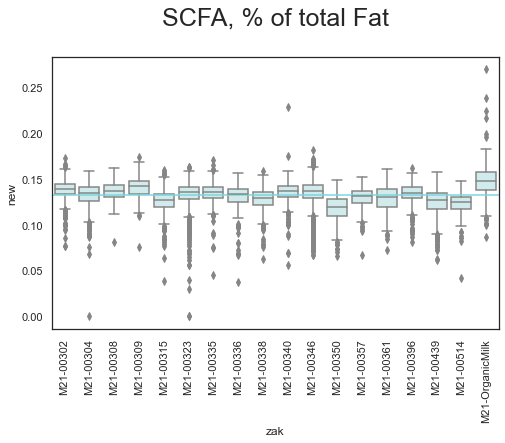

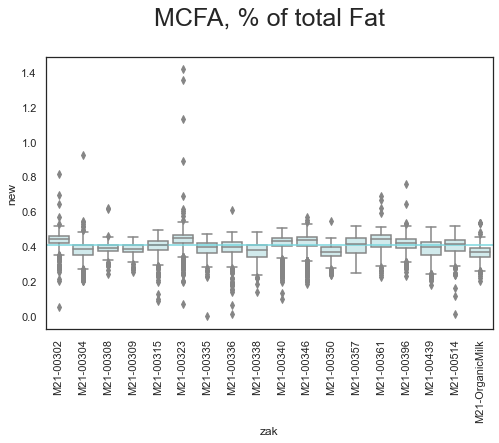

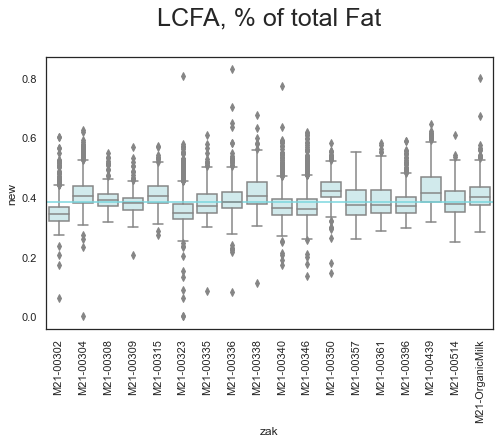

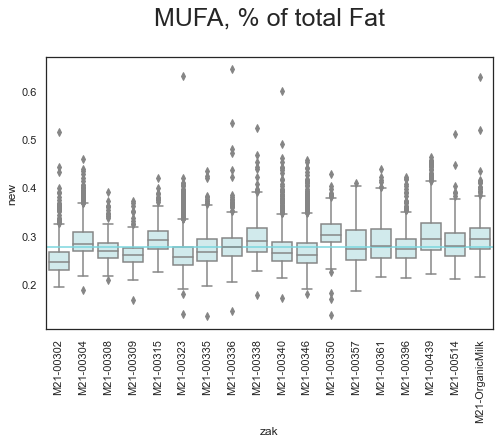

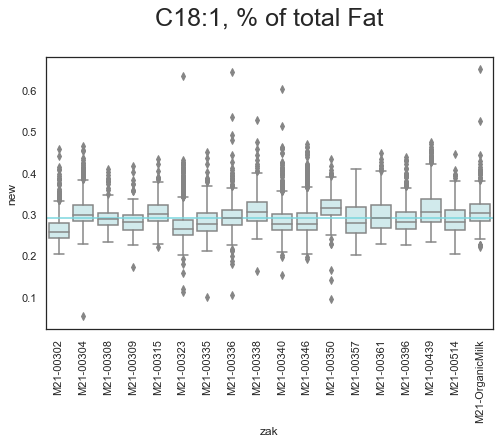

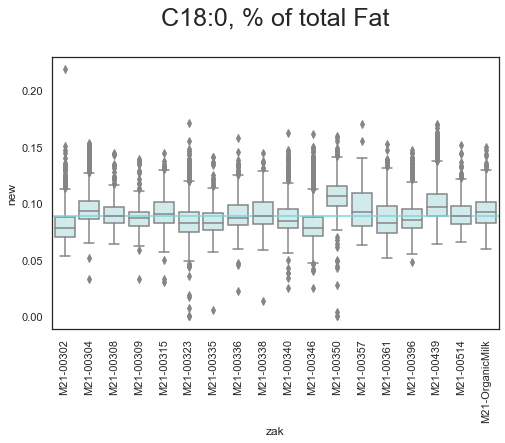

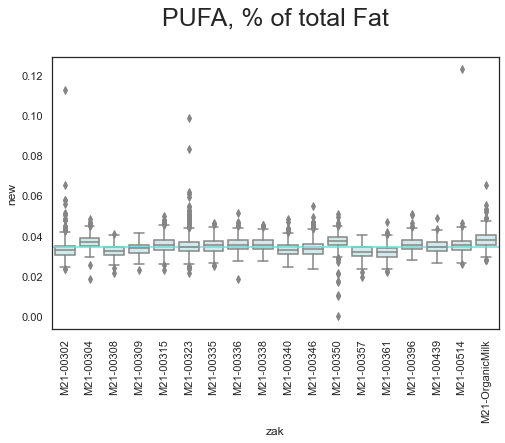

In [31]:
flist = ['SCFA','MCFA','LCFA','MUFA','C18:1','C18:0','PUFA']

for fa in flist:
    ax = plt.subplots(figsize=(8, 5))
    plt.title(str(fa)+', % of total Fat'+'\n', fontsize=25)

    tb['new'] = tb[fa]/tb['Fat']

    ax = sns.boxplot(x="zak", y='new', data=tb, color='#cceef0')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

    ax.axhline(y=tb['new'].mean(), color='#7ad7de', linestyle='-')
    plt.savefig('./results1/'+str(fa)+'-rel.png', dpi=200, bbox_inches='tight')

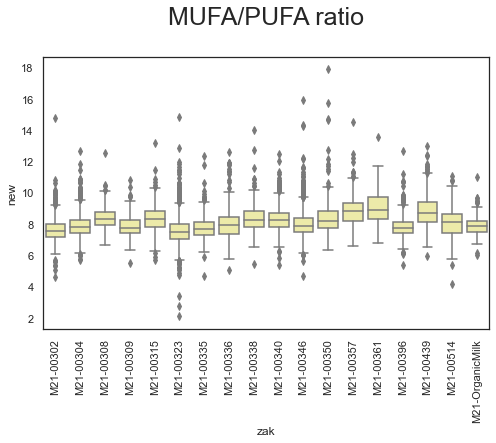

In [32]:
ax = plt.subplots(figsize=(8, 5))
plt.title('MUFA/PUFA ratio'+'\n', fontsize=25)

tb['new'] = (tb['MUFA']/tb['Fat'])/(tb['PUFA']/tb['Fat'])
ax = sns.boxplot(x="zak", y='new', data=tb, color='#f7f49e')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

ax.axhline(y=tb['new'].mean(), color='#7ad7de', linestyle='-')
plt.savefig('./results1/MUFA-PUFA_ratio.png', dpi=200, bbox_inches='tight')